In [15]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
from statsbombpy import sb
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from IPython.display import display
import json

rcParams['text.color'] = '#c7d5cc'  # set the default text color

In [3]:
# Open the data and assign it to 'df'dataframe
parser = Sbopen()
df = parser.match(competition_id=11, season_id=90)

In [4]:
# Looking at the columns within the dataframe
print (df.columns)

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated', 'last_updated_360',
       'match_week', 'competition_id', 'country_name', 'competition_name',
       'season_id', 'season_name', 'home_team_id', 'home_team_name',
       'home_team_gender', 'home_team_group', 'home_team_country_id',
       'home_team_country_name', 'home_team_managers_id',
       'home_team_managers_name', 'home_team_managers_nickname',
       'home_team_managers_dob', 'home_team_managers_country_id',
       'home_team_managers_country_name', 'away_team_id', 'away_team_name',
       'away_team_gender', 'away_team_group', 'away_team_country_id',
       'away_team_country_name', 'away_team_managers_id',
       'away_team_managers_name', 'away_team_managers_nickname',
       'away_team_managers_dob', 'away_team_managers_country_id',
       'away_team_managers_country_name', 'metadata_data_version',
       'metadata_shot_fidelity_version', 'm

In [5]:
team = "Barcelona"

# Get list of games by Barcelona, either home or away
match_ids = df.loc[(df["home_team_name"] == team) | (df["away_team_name"] == team)]["match_id"].tolist()

# Calculate number of games
no_games = len(match_ids)

In [12]:
# Declaring an empty dataframe for danger passes
incomplete_passes = pd.DataFrame()
for idx in match_ids:
    # Opening the event data for this match
    df = parser.event(idx)[0]
    for period in [1, 2]:
        # Keeping only accurate passes by Messi that were not set pieces in this period
        mask_pass = (df.player_id == 5503) & (df.type_name == "Pass") & (df.outcome_name == "Incomplete") & (df.sub_type_name.isnull())
        # Keeping necessary columns
        passes = df.loc[mask_pass, ["x", "y", "end_x", "end_y", "under_pressure"]]
        
        # Concatenating dataframe with a previous one to keep danger passes from the whole season
        incomplete_passes = pd.concat([incomplete_passes, passes], ignore_index = True)

Text(0.5, 0.98, "Messi's incomplete passes during the 2020-21 La Liga Season")

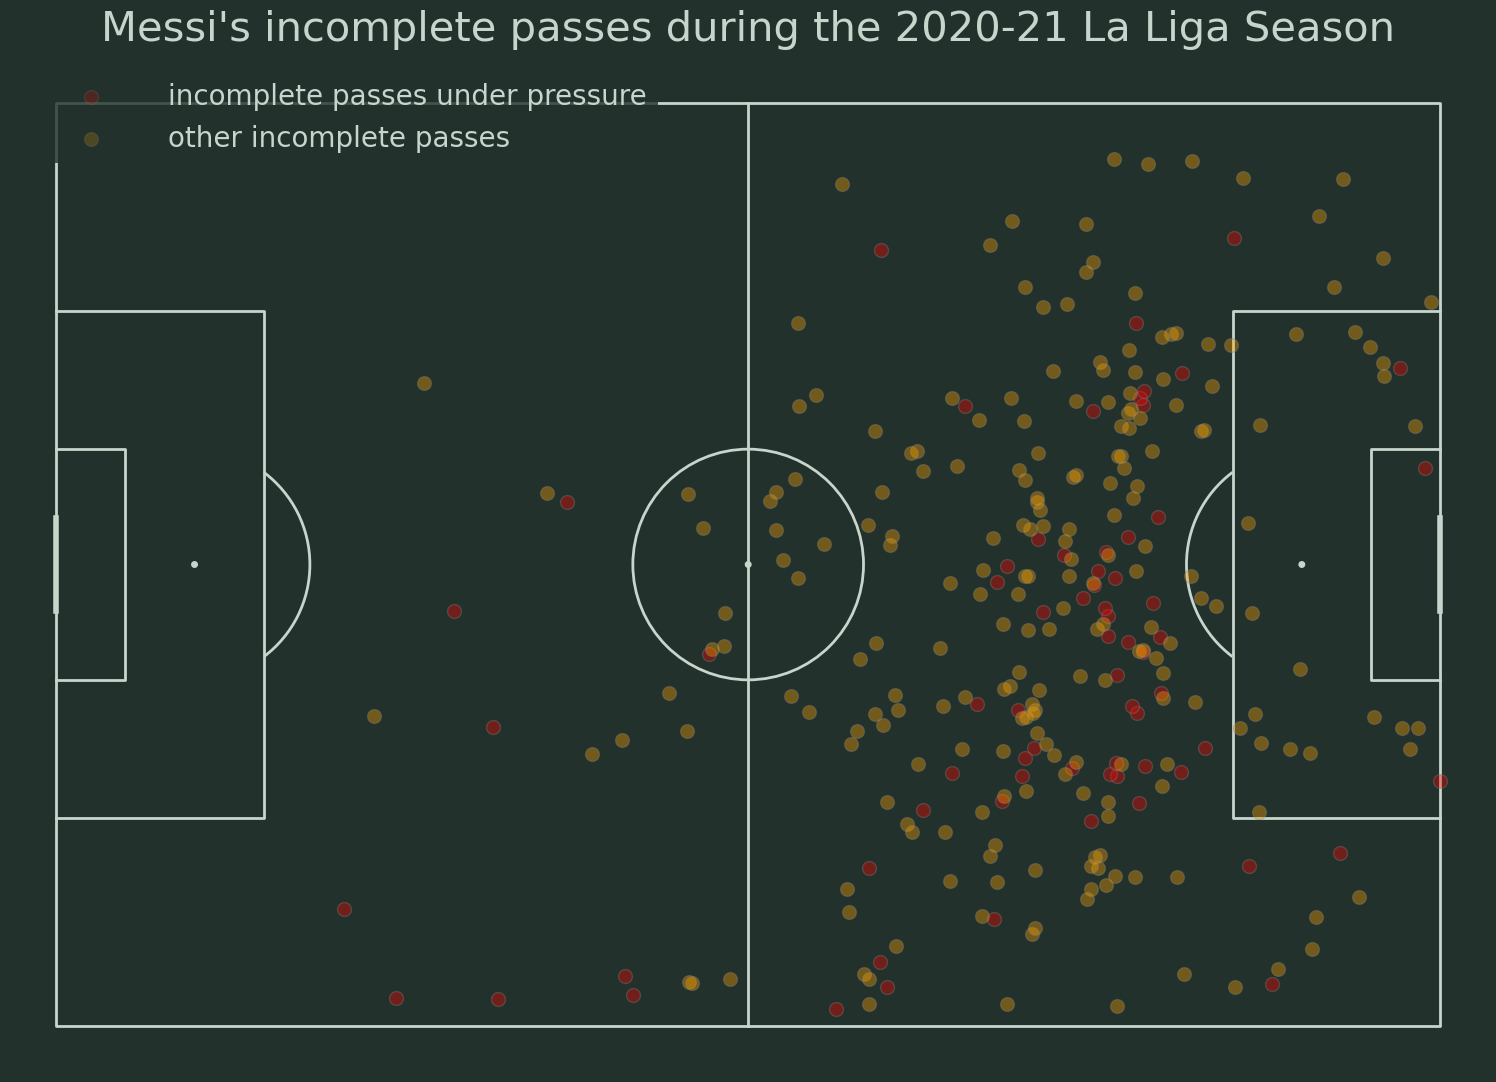

In [34]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the incomplete passes under pressure
lc1 = pitch.scatter(incomplete_passes[incomplete_passes['under_pressure'] == True].x,
                    incomplete_passes[incomplete_passes['under_pressure'] == True].y,
                    s=100, label='incomplete passes under pressure', color='red', edgecolors='grey', linewidth=1, alpha=0.2, ax=ax)

# Plot the other incomplete passes
lc2 = pitch.scatter(incomplete_passes[incomplete_passes['under_pressure'].isnull()].x,
                    incomplete_passes[incomplete_passes['under_pressure'].isnull()].y,
                    s=100, label='other incomplete passes', color='orange', edgecolors='grey', linewidth=1, alpha=0.2, ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's incomplete passes during the 2020-21 La Liga Season", fontsize=30)

In [49]:
import tabulate

# Count the number of incomplete passes under pressure
num_under_pressure = incomplete_passes['under_pressure'].sum()

# Count the number of incomplete passes not under pressure
num_not_under_pressure = incomplete_passes['under_pressure'].isnull().sum()

# Create a table to display the counts
table = [
    ["Incomplete Passes Under Pressure", num_under_pressure],
    ["Incomplete Passes Not Under Pressure", num_not_under_pressure]
]

# Display the table
print(tabulate.tabulate(table, headers=["Category", "Count"], tablefmt="fancy_grid"))

╒══════════════════════════════════════╤═════════╕
│ Category                             │   Count │
╞══════════════════════════════════════╪═════════╡
│ Incomplete Passes Under Pressure     │     138 │
├──────────────────────────────────────┼─────────┤
│ Incomplete Passes Not Under Pressure │     456 │
╘══════════════════════════════════════╧═════════╛


In [41]:
# Count the number of incomplete passes under pressure
num_under_pressure = incomplete_passes[incomplete_passes['under_pressure'] == True].sum()
display(num_under_pressure['under_pressure'])

138.0

In [45]:
# Count the number of incomplete passes under pressure
num_incomplete_passes = incomplete_passes[incomplete_passes['under_pressure'].isnull()].sum()

# Display the number of incomplete passes under pressure
display(num_incomplete_passes)

x                 39102.4
y                 19746.4
end_x             44003.2
end_y             18400.2
under_pressure        0.0
dtype: float64

In [30]:
print(lc2)

In [16]:
print(match_ids)

[3773457, 3773631, 3773665, 3773497, 3773660, 3773593, 3773466, 3773585, 3773552, 3773672, 3773386, 3773565, 3773587, 3773656, 3773377, 3773586, 3773372, 3773387, 3773695, 3773369, 3773661, 3773597, 3773523, 3773571, 3773428, 3764661, 3773526, 3773474, 3773625, 3773403, 3773547, 3773415, 3764440, 3773689, 3773477]


In [17]:
print(no_games)

35
